In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
from plotnine import *

In [3]:
df = pd.read_csv("../datasets/out.csv")
df.head()

/tmp/ipykernel_48569/2450763556.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/out.csv")


,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,...,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
0,1.0,11/6/2022,07:48.2,1.0,1.0,"Elias, Roenis",606273.0,Left,AGU_CIB,"Bonifacio, Emilio",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,11/6/2022,07:49.2,1.0,2.0,"Elias, Roenis",606273.0,Left,AGU_CIB,"Bonifacio, Emilio",...,NaN,NaN,High,High,High,Low,Low,NaN,NaN,NaN
2,3.0,11/6/2022,08:09.8,1.0,3.0,"Elias, Roenis",606273.0,Left,AGU_CIB,"Bonifacio, Emilio",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
3,4.0,11/6/2022,08:24.7,1.0,4.0,"Elias, Roenis",606273.0,Left,AGU_CIB,"Bonifacio, Emilio",...,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
4,5.0,11/6/2022,08:54.1,1.0,5.0,"Elias, Roenis",606273.0,Left,AGU_CIB,"Bonifacio, Emilio",...,NaN,NaN,High,High,High,Low,Low,NaN,NaN,NaN


In [5]:
columns = ['VertBreak', 'HorzBreak', 'PitcherId', 'PitcherThrows','BatterSide', 'RelHeight', 'RelSide', 'TaggedPitchType', 'PlateLocSide', 'PlateLocHeight', 'RelSpeed']

In [6]:
df.RelSide = df.RelSide.apply(lambda x : x * -1)
df = df.loc[(df.PitcherId == 491624) & (df.TaggedPitchType == 'ChangeUp'), columns]
df.head()

,VertBreak,HorzBreak,PitcherId,BatterSide,RelHeight,RelSide,TaggedPitchType,PlateLocSide,PlateLocHeight,RelSpeed
16,-45.21782,14.80426,491624.0,Right,5.59362,-1.98597,ChangeUp,-1.65628,1.42883,78.72926
19,-52.57826,17.20717,491624.0,Right,5.74840,-1.96255,ChangeUp,-0.77842,1.10438,78.48751
20,-55.20708,17.01017,491624.0,Right,5.78946,-1.92776,ChangeUp,-0.93893,1.31984,77.34117
21,-51.84408,12.90426,491624.0,Right,5.58548,-1.82623,ChangeUp,-2.00461,2.26782,75.82302
22,-45.01684,13.88221,491624.0,Right,5.78712,-1.75213,ChangeUp,-1.88849,0.84021,77.92623


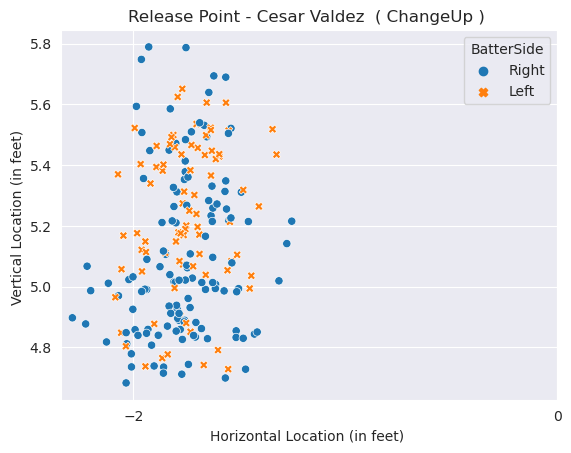

In [7]:
sns.set_style(style='darkgrid')
fig1 = sns.scatterplot(data = df,
                x = 'RelSide',
                y = 'RelHeight',
                hue = 'BatterSide',
                style = 'BatterSide')

plt.title('Release Point - Cesar Valdez  ( ChangeUp ) ')
plt.xlabel('Horizontal Location (in feet) ')
plt.ylabel('Vertical Location (in feet) ')

plt.xticks([-2, 0])
plt.show(fig1)

In [8]:
x = np.array([-.95, .95, .95, -.95, -.95])
z = np.array([1.6, 1.6, 3.5, 3.5, 1.6])
sz = pd.DataFrame(x,z);



df1 = df[df.BatterSide == 'Right']
df2 = df[df.BatterSide == 'Left']

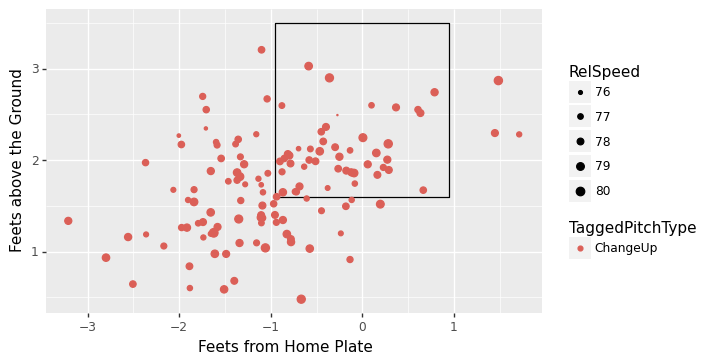

<ggplot: (8754879849433)>

In [9]:
g =  ggplot(df1) + geom_path(aes(x=x, y=z), data = sz) + coord_equal() + xlab('Feets from Home Plate') + ylab('Feets above the Ground') + geom_point(aes ( x = "PlateLocSide", y = "PlateLocHeight", size = "RelSpeed", color="TaggedPitchType"), data = df1) + scale_size(range = (0.01, 3))
g

/home/brayanmnz/anaconda3/envs/pybasebal/lib/python3.9/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_density_2d : Removed 9 rows containing non-finite values.
/home/brayanmnz/anaconda3/envs/pybasebal/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_raster : Removed 128 rows containing missing values.


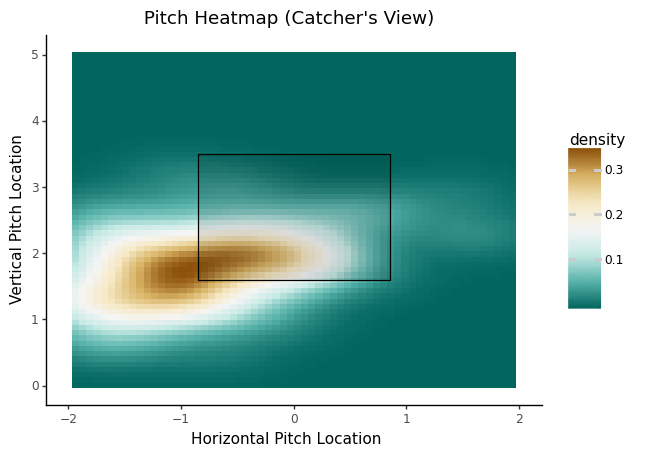

<ggplot: (8754879775091)>

In [13]:
plot=ggplot(df1,aes(x="PlateLocSide",y="PlateLocHeight", ymin = 0, ymax =5)) \
  + stat_density_2d(aes(fill='..density..'),geom='raster', contour = False) \
  + scale_fill_distiller(type="div") \
  + xlim(-2,2) \
  + annotate('rect', xmin = -0.85, xmax = 0.85, ymin = 1.6, ymax = 3.5, fill = 'black', color = 'black', alpha = 0.1) \
  + theme_classic() \
  + xlab("Horizontal Pitch Location") \
  + ylab("Vertical Pitch Location") \
  + ggtitle(title=f" Pitch Heatmap (Catcher's View)")

plot

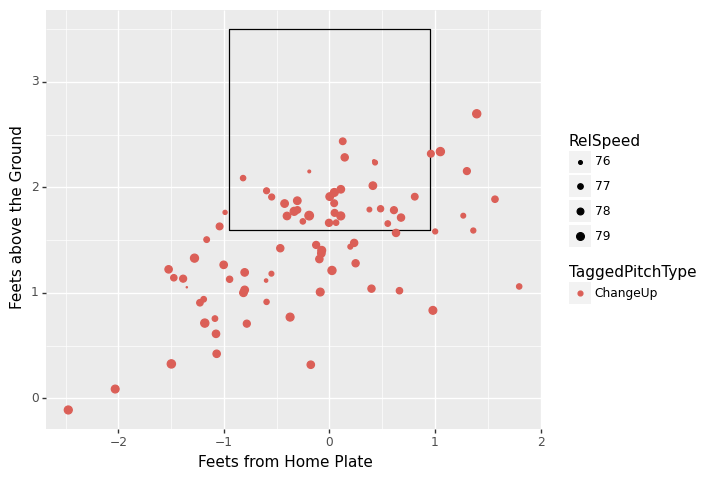

<ggplot: (8783391514742)>

In [50]:
g1 =  ggplot(df2) + geom_path(aes(x=x, y=z), data = sz) + coord_equal() + xlab('Feets from Home Plate') + ylab('Feets above the Ground') + geom_point(aes ( x = "PlateLocSide", y = "PlateLocHeight", size = "RelSpeed", color="TaggedPitchType"), data = df2) + scale_size(range = (0.01, 3))
g1

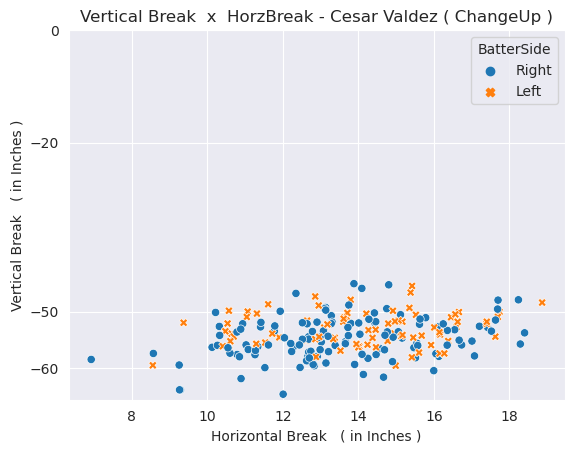

In [16]:
sns.scatterplot(data = df,
               x = 'HorzBreak',
               y = 'VertBreak',
               hue = 'BatterSide',
               style = 'BatterSide')

plt.title('Vertical Break  x  HorzBreak - Cesar Valdez ( ChangeUp )')
plt.ylabel('Vertical Break   ( in Inches )')
plt.xlabel('Horizontal Break   ( in Inches )')

plt.yticks([-60, -50, -20,0 ])
plt.show()

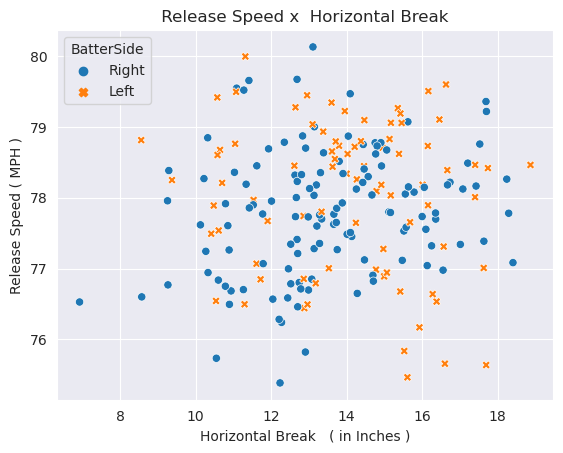

In [17]:
sns.scatterplot(data = df,
                x = 'HorzBreak',
                y = 'RelSpeed',
                hue = 'BatterSide',
                style = 'BatterSide')

plt.title(' Release Speed x  Horizontal Break ')
plt.xlabel('Horizontal Break   ( in Inches )')
plt.ylabel('Release Speed ( MPH )')

plt.show()

In [19]:
df = pd.read_csv("out.csv")
columns = ['VertBreak', 'HorzBreak', 'PitcherId', 'PitchCall', 'PitcherThrows','BatterSide', 'RelHeight', 'RelSide', 'TaggedPitchType', 'PlateLocSide', 'PlateLocHeight', 'RelSpeed']

dfl = df.loc[(df.PitcherThrows == 'Right') & (df.TaggedPitchType == 'Sinker') & (df.BatterSide == 'Left') & (df.PitchCall == 'StrikeCalled'), columns]
dfl.head()

dfr = df.loc[(df.PitcherThrows == 'Right') & (df.TaggedPitchType == 'Sinker') & (df.BatterSide == 'Right') & (df.PitchCall == 'StrikeCalled'), columns]
dfr.head()

/tmp/ipykernel_5577/198617574.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


,VertBreak,HorzBreak,PitcherId,PitchCall,PitcherThrows,BatterSide,RelHeight,RelSide,TaggedPitchType,PlateLocSide,PlateLocHeight,RelSpeed
494,-18.56662,15.69056,471822.0,StrikeCalled,Right,Right,6.38735,2.02823,Sinker,0.44775,1.86605,92.34414
542,-16.37623,14.13367,658551.0,StrikeCalled,Right,Right,6.07685,1.76049,Sinker,-0.26772,2.07909,96.07666
547,-17.47808,15.17544,658551.0,StrikeCalled,Right,Right,6.06741,1.61911,Sinker,-0.20531,2.05694,97.16119
550,-16.37099,13.01690,658551.0,StrikeCalled,Right,Right,5.96383,1.70202,Sinker,0.62420,2.25798,97.05149
622,-24.99797,8.05989,NaN,StrikeCalled,Right,Right,4.97440,3.06153,Sinker,-1.23957,2.75787,87.85030


/home/brayanmnz/anaconda3/envs/pybasebal/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_raster : Removed 128 rows containing missing values.


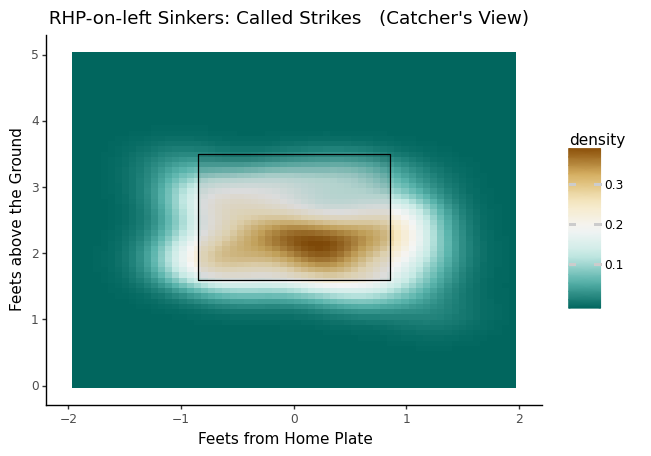

<ggplot: (8754878784570)>

In [23]:

plot=ggplot(dfl,aes(x="PlateLocSide",y="PlateLocHeight", ymin = 0, ymax =5)) \
  + stat_density_2d(aes(fill='..density..'),geom='raster', contour = False) \
  + scale_fill_distiller(type="div") \
  + xlim(-2,2) \
  + annotate('rect', xmin = -0.85, xmax = 0.85, ymin = 1.6, ymax = 3.5, fill = 'black', color = 'black', alpha = 0.1) \
  + theme_classic() \
  + xlab('Feets from Home Plate') \
  + ylab('Feets above the Ground') \
  + ggtitle(title=f" RHP-on-left Sinkers: Called Strikes   (Catcher's View)")

plot

/home/brayanmnz/anaconda3/envs/pybasebal/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_raster : Removed 128 rows containing missing values.


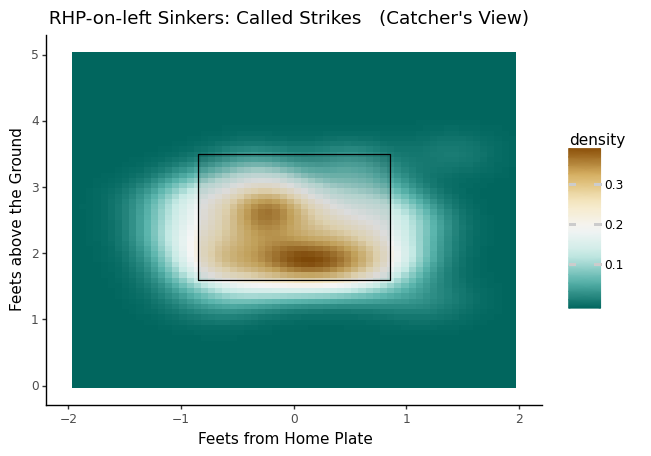

<ggplot: (8754879039305)>

In [21]:

plot=ggplot(dfr,aes(x="PlateLocSide",y="PlateLocHeight", ymin = 0, ymax =5)) \
  + stat_density_2d(aes(fill='..density..'),geom='raster', contour = False) \
  + scale_fill_distiller(type="div") \
  + xlim(-2,2) \
  + annotate('rect', xmin = -0.85, xmax = 0.85, ymin = 1.6, ymax = 3.5, fill = 'black', color = 'black', alpha = 0.1) \
  + theme_classic() \
  + xlab('Feets from Home Plate') \
  + ylab('Feets above the Ground') \
  + ggtitle(title=f" RHP-on-left Sinkers: Called Strikes   (Catcher's View)")

plot